In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.signal import savgol_filter
import matplotlib.ticker as ticker 
from matplotlib import cm
from matplotlib.colors import ListedColormap

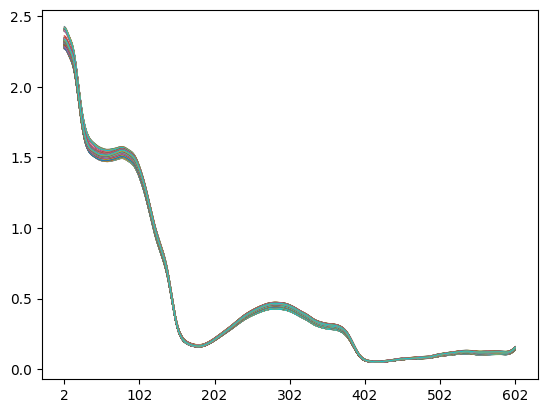

In [3]:
data = pd.read_csv("milk.csv")
fig, ax = plt.subplots(1, 1) 
ax.plot(data.T, linewidth=0.7)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100)) 
plt.show()

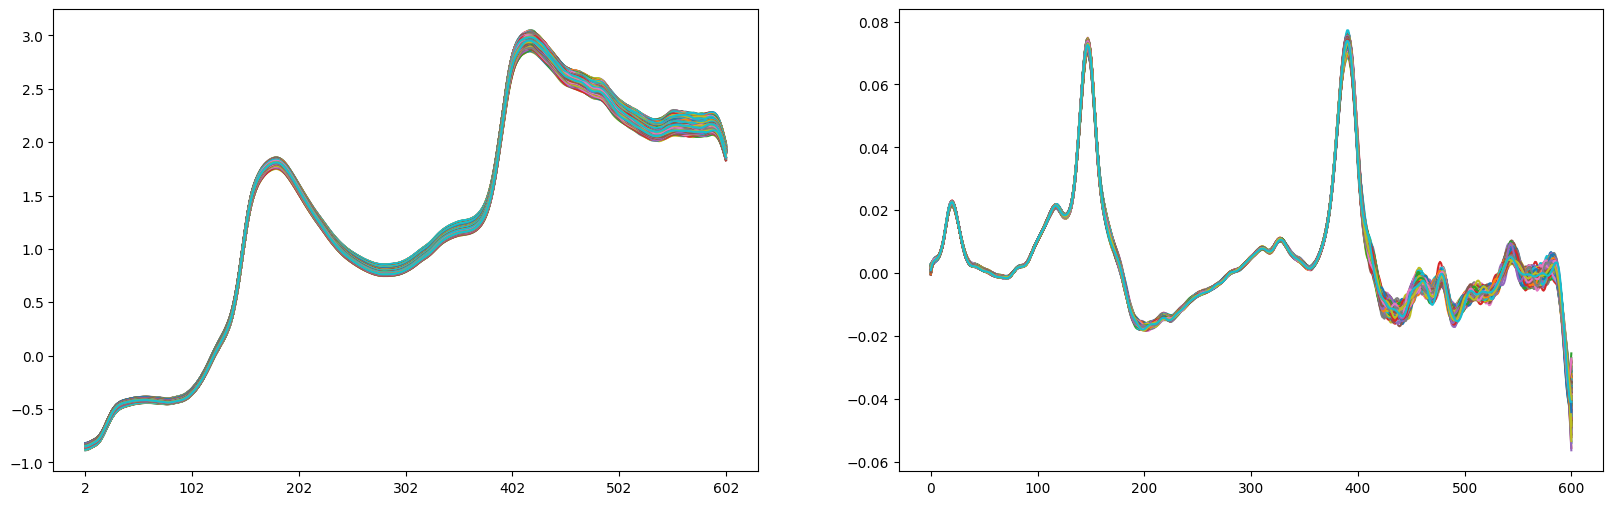

In [4]:
# Biến đổi phổ phản xạ thành phổ hấp thụ 
data = np.log(1.0/data)
# Tạo hai tập dữ liệu: phổ hấp thụ gốc và phổ đạo hàm
o_data = data
d_data = data
# Đạo hàm bậc 1 phổ hấp thụ gốc và làm mượt bằng phương pháp Savitzky-Golay 
d_data = savgol_filter(d_data, 25, polyorder = 5, deriv=1)
# Hiển thị hai tập dữ liệu
fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].plot(o_data.T)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(100)) 
ax[1].plot(d_data.T)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(100)) 
plt.show()

In [5]:
scaler1 = StandardScaler()
o_data = scaler1.fit_transform(o_data)
scaler2 = StandardScaler()
d_data = scaler2.fit_transform(d_data)

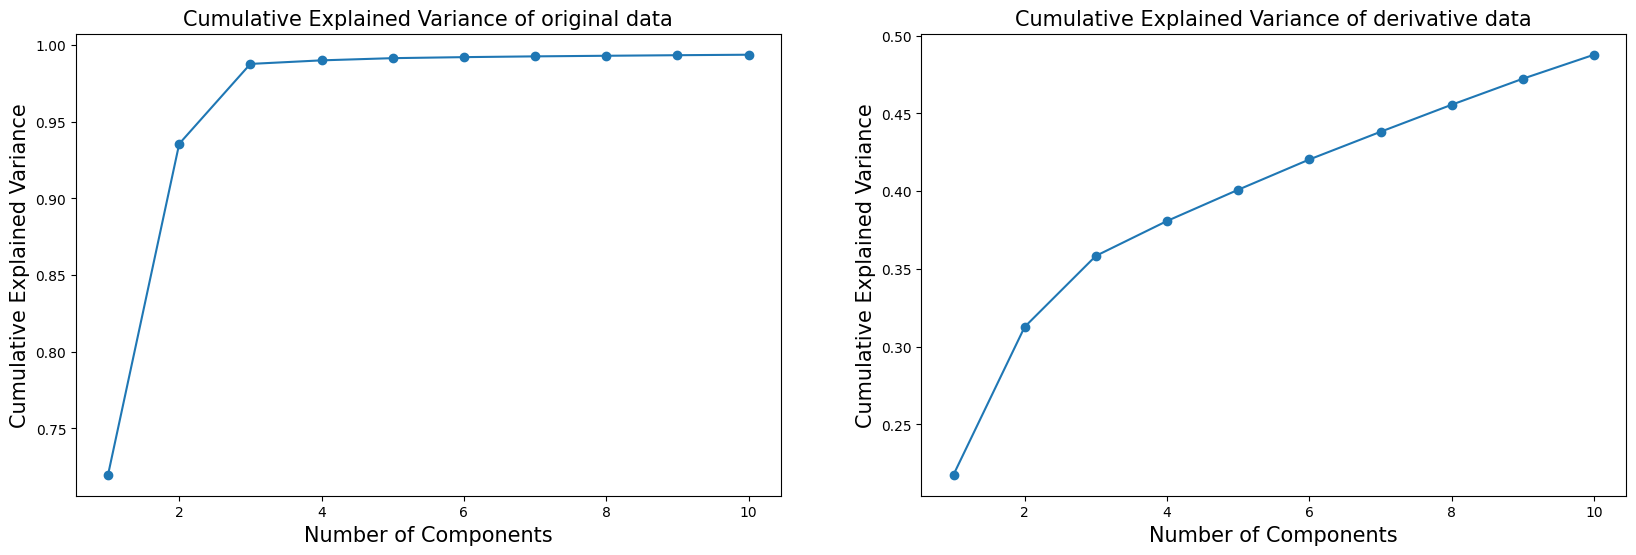

In [10]:
fig, ax_s = plt.subplots(1, 2, figsize=(20,6))
for i,ax in enumerate(ax_s):
    data_PCA = None
    if i == 0:
        data_PCA = o_data
        ax.set_title('Cumulative Explained Variance of original data', fontsize=15)
    else:
        data_PCA = d_data
        ax.set_title('Cumulative Explained Variance of derivative data', fontsize=15)
    pca = PCA(10)
    pca.fit(data_PCA)
    explained_variance = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance)
    ax.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
    ax.set_xlabel('Number of Components', fontsize=15)
    ax.set_ylabel('Cumulative Explained Variance', fontsize=15)
plt.show()

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


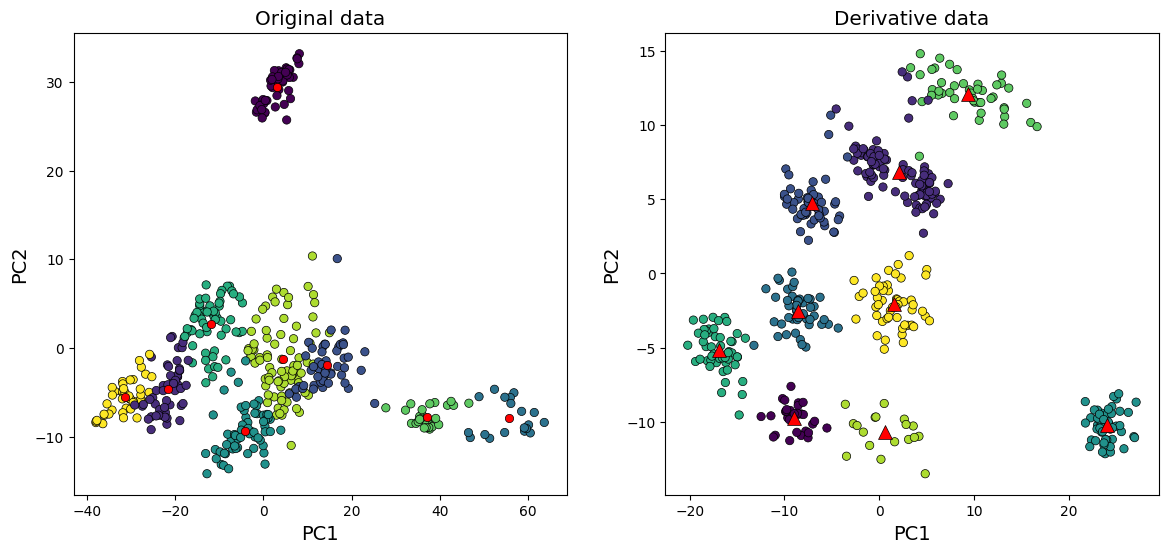

In [25]:
# Giảm chiều dữ liệu về 2PC
o_pca = PCA(2)
o_data_pca = pca.fit_transform(o_data)
d_pca = PCA(2)
d_data_pca = pca.fit_transform(d_data)
# Tạo mô hình KMeans cho từng tập dữ liệu, cho mô hình học và sử dụng mô hình để gán nhãn cho từng điểm dữ liệu
o_kmean = KMeans(9)
o_label = o_kmean.fit_predict(o_data_pca)
d_kmean = KMeans(9)
d_label = d_kmean.fit_predict(d_data_pca)
# Hiển thị dữ liệu phân cụm
fig, ax_s = plt.subplots(1, 2, figsize=(14,6))
with plt.style.context(('ggplot')):
    ax_s[0].scatter(o_data_pca[:, 0], o_data_pca[:, 1],c=o_label,edgecolors='k')
    ax_s[0].scatter(o_kmean.cluster_centers_[:, 0], o_kmean.cluster_centers_[:, 1], c='r', edgecolors='k')
    ax_s[0].set_xlabel("PC1", fontsize=14)
    ax_s[0].set_ylabel("PC2", fontsize=14)
    ax_s[0].set_title("Original data")

    ax_s[1].scatter(d_data_pca[:, 0], d_data_pca[:, 1],c=d_label,edgecolors='k')
    ax_s[1].scatter(d_kmean.cluster_centers_[:, 0], d_kmean.cluster_centers_[:, 1], marker='^', s=100,c='r', edgecolors='k')
    ax_s[1].set_xlabel("PC1", fontsize=14)
    ax_s[1].set_ylabel("PC2", fontsize=14)
    ax_s[1].set_title("Derivative data")
plt.show()